# Processor temperature

We have a temperature sensor in the processor of our company's server. We want to analyze the data provided to determinate whether we should change the cooling system for a better one. It is expensive and as a data analyst we cannot make decisions without a basis.

We provide the temperatures measured throughout the 24 hours of a day in a list-type data structure composed of 24 integers:
```
temperatures_C = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]
```

## Goals

1. Treatment of lists
2. Use of loop or list comprenhention
3. Calculation of the mean, minimum and maximum.
4. Filtering of lists.
5. Interpolate an outlier.
6. Logical operators.
7. Print

## Temperature graph
To facilitate understanding, the temperature graph is shown below. You do not have to do anything in this section. The test starts in **Problem**.

Text(0.5, 1.0, 'Temperatures of our server throughout the day')

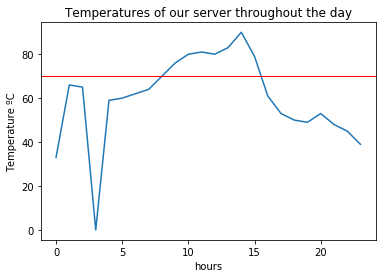

In [1]:
# import
import matplotlib.pyplot as plt
%matplotlib inline

# axis x, axis y
y = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]
x = list(range(len(y)))

# plot
plt.plot(x, y)
plt.axhline(y=70, linewidth=1, color='r')
plt.xlabel('hours')
plt.ylabel('Temperature ºC')
plt.title('Temperatures of our server throughout the day')

## Problem

If the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature above 80ºC or the average exceeds 65ºC throughout the day, we must give the order to change the cooling system to avoid damaging the processor.

We will guide you step by step so you can make the decision by calculating some intermediate steps:

1. Minimum temperature
2. Maximum temperature
3. Temperatures equal to or greater than 70ºC
4. Average temperatures throughout the day.
5. If there was a sensor failure at 03:00 and we did not capture the data, how would you estimate the value that we lack? Correct that value in the list of temperatures.
6. Bonus: Our maintenance staff is from the United States and does not understand the international metric system. Pass temperatures to Degrees Fahrenheit.

Formula: F = 1.8 * C + 32

web: https://en.wikipedia.org/wiki/Conversion_of_units_of_temperature


In [25]:
# assign a variable to the list of temperatures

temps = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]

# 1. Calculate the minimum of the list and print the value using print()

print("Minimum temperature (ºC): ", min(temps))

# 2. Calculate the maximum of the list and print the value using print()

print("Maximum temperature (ºC): ", max(temps))

# 3. Items in the list that are greater than 70ºC and print the result

print("Temperatures above 70 ºC: ")
for temp in temps:
    if temp > 70:
        print(temp)

# 4. Calculate the mean temperature throughout the day and print the result

import statistics
print("Mean temperature (ºC):", statistics.mean(temps))

# 5.1 Solve the fault in the sensor by estimating a value

est_value = int((temps[2] + temps[4])/2)
print("Estimated temperature (ºC) at time point 3:00:", est_value)

# 5.2 Update of the estimated value at 03:00 on the list

temps[3] = est_value
print("New temperature list:", temps)

# Bonus: convert the list of ºC to ºFarenheit
# Formula: F = 1.8 * C + 32

list_fahrenheit = []
for temp in temps:
    temp_fahrenheit = int(1.8 * temp + 32)
    list_fahrenheit.append(temp_fahrenheit)

print("Temperatures in Fahrenheit:", list_fahrenheit)


Minimum temperature (ºC):  0
Maximum temperature (ºC):  90
Temperatures above 70 ºC: 
76
80
81
80
83
90
79
Mean temperature (ºC): 60.25
Estimated temperature (ºC) at time point 3:00: 62
New temperature list: [33, 66, 65, 62, 59, 60, 62, 64, 70, 76, 80, 81, 80, 83, 90, 79, 61, 53, 50, 49, 53, 48, 45, 39]
Temperatures in Fahrenheit: [91, 150, 149, 143, 138, 140, 143, 147, 158, 168, 176, 177, 176, 181, 194, 174, 141, 127, 122, 120, 127, 118, 113, 102]


## Take the decision
Remember that if the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature higher than 80ºC or the average was higher than 65ºC throughout the day, we must give the order to change the cooling system to avoid the danger of damaging the equipment:
* more than 4 hours with temperatures greater than or equal to 70ºC
* some temperature higher than 80ºC
* average was higher than 65ºC throughout the day
If any of these three is met, the cooling system must be changed.


In [48]:
# Print True or False depending on whether you would change the cooling system or not


def find_n_consecutive_greater_equal_than_x(mylist, n, x):
    num_greater_than_x = 0
    for index, val in enumerate(mylist):
        if val >= x:
            num_greater_than_x += 1
            if num_greater_than_x == n:
                yield tuple(mylist[index-n+1:index+1])
                num_greater_than_x -= 1
        else:
            num_greater_than_x = 0
            
high_temps = []
#print("The following eight consecutive values are above 70 ºC", list(find_n_consecutive_greater_equal_than_x(temps, 8, 70)))
high_temps.append(list(find_n_consecutive_greater_equal_than_x(temps, 8, 70))) 

change_sensor = []
            
if high_temps != []:
        change_sensor.append("True")
else:
    for temp in temps:
        if temp <= 80:
            change_sensor.append("False")
        elif temp > 80:
            change_sensor.append("True")
        if statistics.mean(temps) <= 65:
            change_sensor.append("False")
        elif statistics.mean(temps) > 65:
            change_sensor.append("True")
        else:
            change_sensor.append("")

print(change_sensor)


['True']


## Future improvements
1. We want the hours (not the temperatures) whose temperature exceeds 70ºC
2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?
3. Average of each of the lists (ºC and ºF). How they relate?
4. Standard deviation of each of the lists. How they relate?


In [133]:
# 1. We want the hours (not the temperatures) whose temperature exceeds 70ºC

# import numpy

# array = numpy.arange(0, 24)
# print(array)

temps = [33,66,65,62,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]

hours = [x for x in range(0, 24)]

dictionary = dict(zip(hours, temps))
temps_above_70 = [k for k,v in dictionary.items() if float(v) >= 70]

print("The temperature was above 70 ºC at the following time points: ")
for temp in temps_above_70:
    print(temp)



The temperature was above 70 ºC at the following time points: 
8
9
10
11
12
13
14
15


In [132]:
# 2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?

count = 0
for x in range(0, len(temps_above_70)):
    if temps_above_70[x] + 1 == temps_above_70[x+1]:
        count += 1
    if count > 4:
        print("The temperature has been equalt to or above 70 ºC for more than four hours.")
        break

The temperature has been equalt to or above 70 ºC for more than four hours.


In [163]:
# 3. Average of each of the lists (ºC and ºF). How they relate?

import statistics

average_C = int(statistics.mean(temps))
print("Temperature average in ºC:", average_C)

average_F = int(statistics.mean(list_fahrenheit))
print("Temperature average in F:", average_F)

def round_school(x):
    i, f = divmod(x, 1)
    return int(i + ((f >= 0.5) if (x > 0) else (f > 0.5)))

if True:
    (round_school(average_F) == round_school(1.8 * average_C + 32))
    print("The averages relate according to the formula F = 1.8 * C + 32.")

Temperature average in ºC: 62
Temperature average in F: 144
The averages relate according to the formula F = 1.8 * C + 32.


In [167]:
# 4. Standard deviation of each of the lists. How they relate?

stdev_C = int(statistics.stdev(temps))
print("Standard deviation of temperatures in ºC:", stdev_C)

stdev_F = int(statistics.stdev(list_fahrenheit))
print("Standard deviation of temperatures in F:", stdev_F)

if True:
    (round_school(stdev_F) == round_school(1.8 * stdev_C + 32))
    print("The standard deviations relate according to the formula F = 1.8 * C + 32.")


Standard deviation of temperatures in ºC: 14
Standard deviation of temperatures in F: 26
The standard deviations relate according to the formula F = 1.8 * C + 32.
